# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of November 19 (Thu)**


### Student Information 

_Full Name (Last Name, First Name)_: Rangel, Jerico Miguel\
_Student No._: 2018-11666\
_Section_: WFU-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Jerico Miguel Tapang Rangel**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

1. I define the necessary initial values and the necessary arrays to be used in storing the data. I also define the two differential equations as $f_1$ and $f_2$ which whill be functions to be iterated into. To be able to apply the fourth-order Runge-Kutta method, I define a third function $f(r,t)$ which inputs values of x and y into both $f_1$ and $f_2$ simultaneously. The interval is set to be from 0 to 30 seconds, and I used 1000 steps in order to produce a smooth graph. For every value of t per step, the values of x and y change via k1,k2,k3, and k4 as per the Runge-Kutta method. These values are then stored into the arrays **rvalsx** and **rvalsy**. The corresponding values can then be plotted to solve the two differential equations.

2. I import matplotlib and use the plot function to plot the data for both equations. I add the necessary labels and the legend. It can be seen that the population of rabbits is at maximum when the population of foxes is at minimum. The inverse is true, and this makes sense due to their predator-prey relationship. 

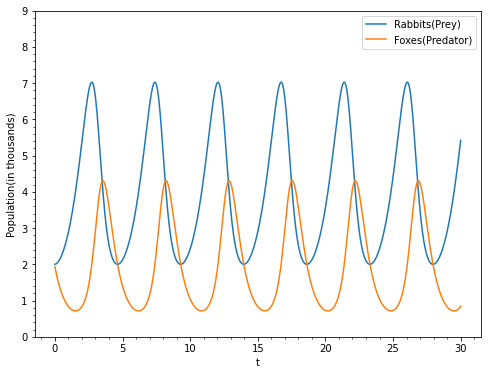

In [2]:
import numpy as np

alpha = 1
beta = gamma = 0.5
delta = 2
t1 = index = 0
t2 = 30
N = 1000
h = (t2-t1)/N

r=np.array([2,2],float)
tvals=np.zeros(N,float)
rvalsx=np.zeros(N,float)
rvalsy=np.zeros(N,float)

def f1(x,y):
  return alpha*x -beta*x*y
def f2(x,y):
  return gamma*x*y -delta*y
def f(r,t):
  return np.array([f1(r[0],r[1]),f2(r[0],r[1])],float)
divs = np.linspace(t1,t2,N)

for t in divs:
  tvals[index] = t
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1,t+0.5*h)
  k3 = h*f(r+0.5*k2,t+0.5*h)
  k4 = h*f(r+k3,t+h)
  r += (k1+2*k2+2*k3+k4)/6
  rvalsx[index] = r[0]
  rvalsy[index] = r[1]
  index += 1

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(tvals,rvalsx, label = "Rabbits(Prey)")
plt.plot(tvals,rvalsy, label = "Foxes(Predator)") 
plt.xlabel("t") 
plt.ylabel("Population(in thousands)") 
plt.ylim((0,9)) 

plt.legend(loc="best")
plt.minorticks_on() 

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


1. Similar to problem 1, I define the necessary initial and constant values. The main difference is the functions that are defined. After defining the given functions as well, I use the algorithm for the Runge-Kutta method to get values for both theta as a function of time and omega as a function of time. 

2. We are interested more in $\theta(t)$ so we do not plot the values for omega anymore. I use matplotlib to plot the function. For a graph similar to that of the guide (also for better clarity), I copy the horizontal guidelines as well as the minor ticks. I add the necessary labels. The graph shows how the pendulum swings and its period which is at around 2.5 seconds. This is an ideal system so the amplitude does not decrease over time, there is no loss of energy during swinging.

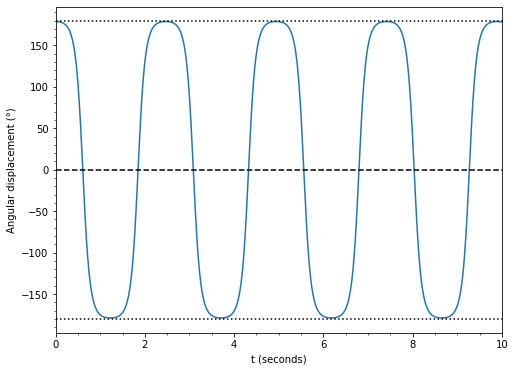

In [3]:
import numpy as np
from math import sin,pi
g=9.81
l=0.1
N=1000
t1=0
t2=10
h = (t2-t1)/N
index=0

r=np.array([179*pi/180,0],float)
tvals=np.zeros(N,float)
thetavals=np.zeros(N,float)
omegavals=np.zeros(N,float)

def f1(theta,omega):
  return omega
def f2(theta,omega):
  return (-g/l)*sin(theta)
def f(r,t):
  return np.array([f1(r[0],r[1]),f2(r[0],r[1])],float)
divs = np.linspace(t1,t2,N)

for t in divs:
  tvals[index] = t
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1,t+0.5*h)
  k3 = h*f(r+0.5*k2,t+0.5*h)
  k4 = h*f(r+k3,t+h)
  r += (k1+2*k2+2*k3+k4)/6
  thetavals[index] = r[0]
  omegavals[index] = r[1]
  index += 1

import matplotlib.pyplot as plt

thetavals = (180/pi)*thetavals

plt.figure(figsize=(8,6))
plt.plot(tvals,thetavals)

plt.axhline(0, color="black", ls='--')
plt.axhline(180, color="black", ls=':')
plt.axhline(-180, color="black", ls=':')

plt.xlabel("t (seconds)") 
plt.ylabel("Angular displacement (°)")

plt.xlim((0,10)) 
plt.minorticks_on() 

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



1. The code from example 8.9 calculates the ground state energy of an electron in an infinite square potential well with given dimensions. This is done by applying the fourth order Runge-Kutta method to solve these two equations:
$$\frac{{\rm d}\psi}{{\rm d}t}  = \phi,$$
$$\frac{{\rm d}\phi}{{\rm d}t}  = \frac{2m}{\hbar^2}(V(x)-E)\psi$$
These equations are derived from the time-independent Schrödinger equation, which was manipulated to result into two first-order differential equations. For this problem, we define the necessary constants, and the boundary $x = - 10a$ to $+10a$. For general accuracy we set N to 1000 steps. Afterwards we define the potential function $V(x)$, and the function $f(r,x,E)$ and $solve(E)$ for the execution of the fourth order Runge-Kutta method. In the **solve** function, we start at the boundary where $\psi =0$ and we guess an initial value $\phi = 1$. With these set, we are able to solve the two differential equations with one of the boundary conditions satisfied, $\psi(-10a) = 0$. With just a guess, we are able to find the general shape of the solution. This however does not necessarily solve the problem since the other boundary condition needs to be satisifed. This is done be utilizing the secant method, i.e. varying the energy, to find an energy eigenstate of the wavefunction. The secant method takes the value of $\psi$ local to the boundary as a function and finds its root such that $\psi(10a) = 0$. For the initial energies, we can set $E_1=0$ and $E_2=e$, which is 1 eV. The following loop varies these energies until a root/energy eigenstate is found that is accurate up to 1 meV. This very first value which is obtained is known as the ground state energy, where the wavefunction cannot exist at a lower energy due to the quantized nature of the energy of quantum particles. 

In [4]:
from numpy import array,arange

m=9.1094e-31
hbar=1.0546e-34
e=1.6022e-19
a=10**-11
x1=-10*a
x2=10*a
N=1000
h=(x2-x1)/N
V0=50*e

def V(x):
  return (V0*x*x)/(a*a)
def f(r,x,E):
  psi = r[0]
  phi = r[1]
  fpsi = phi
  fphi = (2*m/hbar**2)*(V(x)-E)*psi
  return array([fpsi,fphi],float)

def solve(E):
  psi = 0.0
  phi = 1.0
  r = array([psi,phi],float)
  for x in arange(x1,x2,h):
    k1 = h*f(r,x,E)
    k2 = h*f(r+0.5*k1,x+0.5*h,E)
    k3 = h*f(r+0.5*k2,x+0.5*h,E)
    k4 = h*f(r+k3,x+h,E)
    r += (k1+2*k2+2*k3+k4)/6
  return r[0]

E1=0.0
E2=e
psi2=solve(E1)

target =e/1000
while abs(E1-E2)>target:
  psi1,psi2=psi2,solve(E2)
  E1,E2 = E2,E2-(psi2*(E2-E1)/(psi2-psi1))

E_ground=E2/e
print("Ground state E =",E_ground,"eV")

Ground state E = 138.02397130603683 eV


> To find the first excited state, we increase the initial energy values to find the next root/energy eigenstate in which the wavefunction exists. I was able to find the value of 414 eV when I set E1 to 140 eV and E2 to 400 eV. This value is the energy of the first excited state, the second possible discrete energy value.

In [5]:
E1=140*e
E2=400*e
psi2=solve(E1)

target =e/1000
while abs(E1-E2)>target:
  psi1,psi2=psi2,solve(E2)
  E1,E2 = E2,E2-(psi2*(E2-E1)/(psi2-psi1))
  
E_excited1=E2/e
print("First excited state E =",E_excited1,"eV")

First excited state E = 414.0719165423931 eV


Similarly, for the next excited state, I change the initial values. The value 690 eV is then found to be the energy of the second excited state.

In [6]:
E1=400*e
E2=600*e
psi2=solve(E1)

target =e/1000
while abs(E1-E2)>target:
  psi1,psi2=psi2,solve(E2)
  E1,E2 = E2,E2-(psi2*(E2-E1)/(psi2-psi1))

E_excited2=E2/e
print("Second excited state E =",E_excited2,"eV")

Second excited state E = 690.1198621045553 eV


In [7]:
print("The first and second excited states have energies %.10f and %.10f times the ground energy state" % (E_excited1/E_ground, E_excited2/E_ground)) 

The first and second excited states have energies 3.0000000190 and 5.0000000404 times the ground energy state


2. For this anharmonic oscillator, we redefine the potential function to $V(x) = V_0 x^4 /a^4$, which is quartic. Since similar constants and parameters are used, we can reuse the $solve(E)$ function and use the secant method again to find energy eigenstates of the wavefunction. The ground state energy is found to be 205 eV.

In [8]:
def V(x):
  return (V0*x**4)/(a**4)

E1=0.0
E2=e
psi2=solve(E1)

target =e/1000
while abs(E1-E2)>target:
  psi1,psi2=psi2,solve(E2)
  E1,E2 = E2,E2-(psi2*(E2-E1)/(psi2-psi1))
  
E_ground2 =E2/e
print("Ground state E =",E_ground2,"eV")

Ground state E = 205.30690346934932 eV


The next excited state is acquired when the boundary values are set to 210 eV and 1000 eV. The energy of this state is 735 eV.

In [9]:
E1=210*e
E2=1000*e
psi2=solve(E1)

target =e/1000
while abs(E1-E2)>target:
  psi1,psi2=psi2,solve(E2)
  E1,E2 = E2,E2-(psi2*(E2-E1)/(psi2-psi1))
  
E_excited12 = E2/e
print("First excited state E =",E_excited12,"eV")

First excited state E = 735.6912470404218 eV


The second excited state's energy is above 1000eV at 1443 eV.

In [10]:
E1=1000*e
E2=1500*e
psi2=solve(E1)

target =e/1000
while abs(E1-E2)>target:
  psi1,psi2=psi2,solve(E2)
  E1,E2 = E2,E2-(psi2*(E2-E1)/(psi2-psi1))

E_excited22 = E2/e
print("Second excited state E =",E_excited22,"eV")

Second excited state E = 1443.5694213458567 eV


3. For this part, the boundary is set to $x = - 5a$ to $+5a$. We use the same number of steps, 1000, the same potential function, and the same algorithm for the fourth order Runge-Kutta method. We added the arrays **x_grid** and **psi_grid** to be able to plot the wavefunctions. 

In [11]:
import numpy as np

x1 = -5*a
x2 = 5*a
N =  1000
h = (x2-x1)/N

def V(x):
    return (V0*x**4)/(a**4)

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

def get_psi(E):
    tpoints = arange(x1,x2,h)
    xpoints = []              
    ypoints = []              
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t,E)
        k2 = h*f(r+0.5*k1,t+0.5*h,E)
        k3 = h*f(r+0.5*k2,t+0.5*h,E)
        k4 = h*f(r+k3,t+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    x_grid = np.array(tpoints)
    psi_grid = np.array(xpoints)
    return x_grid, psi_grid

To get the datapoints for each energy eigenstate, we convert the energy to Joules and run the function **get_psi** for each. We now have a data for x values, and corresponding y values for each possible energy state of the wavefunction.

In [12]:
E = E_ground2*e
x_grid, psi_grid1 = get_psi(E)

E = E_excited12*e
x_grid, psi_grid2 = get_psi(E)

E = E_excited22*e
x_grid, psi_grid3 = get_psi(E)

To normalize the wavefunctions, we need to take the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ for each case. We define a function **get_integral** which employs the trapezoidal rule method to calculate integrals. 

In [13]:
def get_integral(xx, yy):

  N = len(xx)
  s = 0.5*yy[0] + 0.5*yy[-1]
  for k in range(1,N):
    s += yy[k]

  return s

We solve for the value A in the equation $A^2\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x=1$, which is obtained by taking the square root of the inverse of the integral. The value of A here is then the normalization factor, which is obtained for each wavefunction and set as c1, c2, and c3.

In [14]:
from math import sqrt

c1 = 1/sqrt(get_integral(x_grid,psi_grid1**2))
c2 = 1/sqrt(get_integral(x_grid,psi_grid2**2))
c3 = 1/sqrt(get_integral(x_grid,psi_grid3**2))

print("Normalization factors for the first 3 energy states: %.6e, %.6e, %.6e" % (c1,c2,c3))

Normalization factors for the first 3 energy states: 1.111185e+04, 3.952162e+04, 1.206324e+05


In [15]:
psi_norm1 = c1*psi_grid1
psi_norm2 = c2*psi_grid2
psi_norm3 = c3*psi_grid3

The wavefunctions are plotted using matplotlib.pyplot and it's plot function. We can see that the wavefunctions with more energy, also has more peaks and has higher frequency. This is in line with the equation $E=hf$ wherein the energy is directly proportional to the frequency. We can also see that the boundary conditions are approximately satisfied, that is, $\psi(-5a)=0$ and $\psi(5a)=0$.

Text(0, 0.5, 'psi(x)')

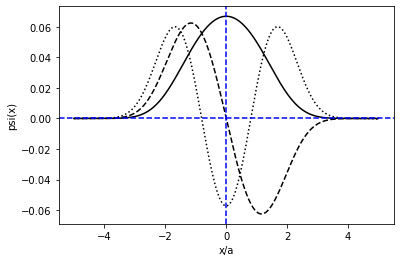

In [17]:
import matplotlib.pyplot as plt
xplot = x_grid/a # plot the scaled position (by a) 
plt.plot(xplot,psi_norm1, color='black') # plot wavefunction of ground state 
plt.plot(xplot,psi_norm2, ls='--', color='black') # plot wavefunction of first excited state 
plt.plot(xplot,psi_norm3, ls='dotted', color='black') # plot wavefunction of second excited state 

plt.axhline(0.0, ls='--', color='blue')
plt.axvline(0.0, ls='--', color='blue')
plt.xlabel("x/a")
plt.ylabel("psi(x)")